# Problem: Unsharp Masking

Implement an unsharp masking operation (http://en.wikipedia.org/wiki/Unsharp_masking) by blurring an image and then subtracting the blurred version from the original. This gives a sharpening effect to the image. Try this on both color and grayscale images.

In [1]:
# So that local modules can be imported:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from PIL import Image
from numpy import *
from scipy.ndimage import filters
from matplotlib import pyplot

from lib.plot_gallery import *

matplotlib.rcParams['figure.dpi'] = 150

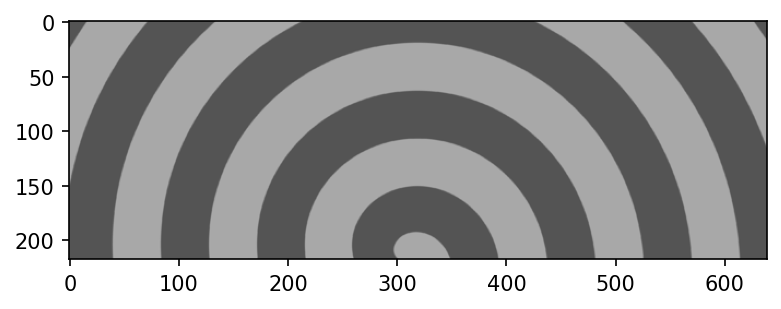

In [2]:
UNSHARP_MASK_PATH = '../example-images/unsharp-mask.png'
im = Image.open(UNSHARP_MASK_PATH)

pyplot.imshow(im, cmap='gray', vmin=0, vmax=255)

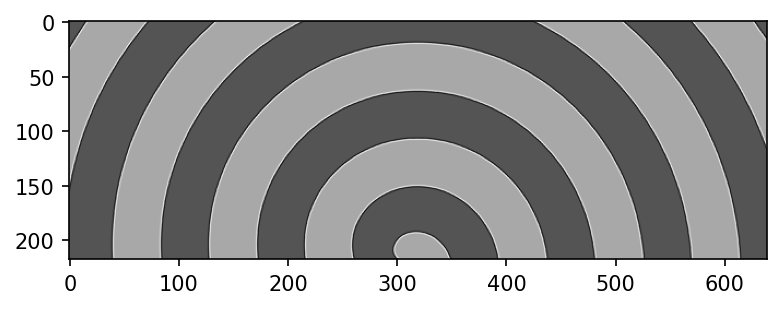

In [3]:
SHARPEN_FILTER = [
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0],
]
sharpened_im = filters.convolve(im, SHARPEN_FILTER)

pyplot.imshow(sharpened_im, cmap='gray', vmin=0, vmax=255)


<Figure size 900x600 with 0 Axes>

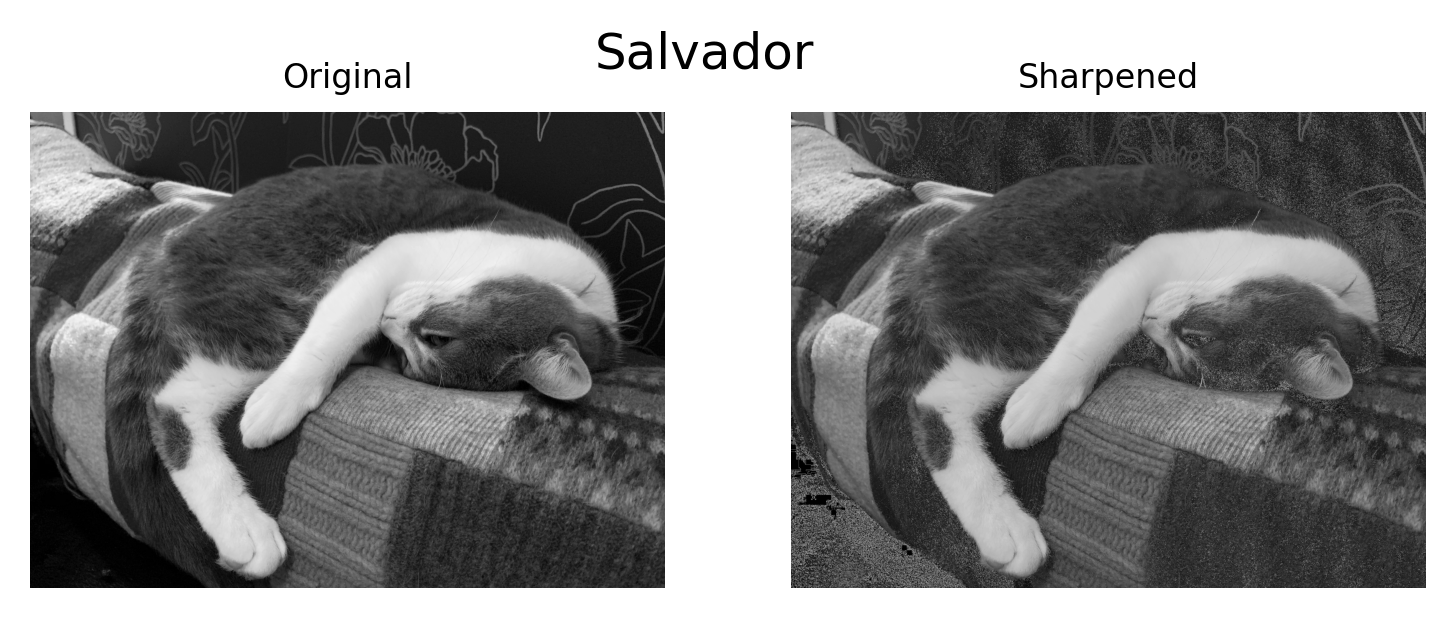

In [4]:
salvador = Image.open('../example-images/pets/salvador_sleeping.jpg').convert('L')
salvador_sharp = filters.convolve(salvador, SHARPEN_FILTER)

pyplot.set_cmap('gray')
gallery = PlotGallery(title = 'Salvador', dpi = 300)
gallery.add_exhibit(Exhibit(salvador, 'Original'))
gallery.add_exhibit(Exhibit(salvador_sharp, 'Sharpened'))
gallery.open()


Note that in the color example below, I was not able to figure out how to get the convolution working so I used the built-in PIL functions. The commented out code was my attempt using NumPy arrays as ispired by https://muthu.co/basics-of-image-convolution/.

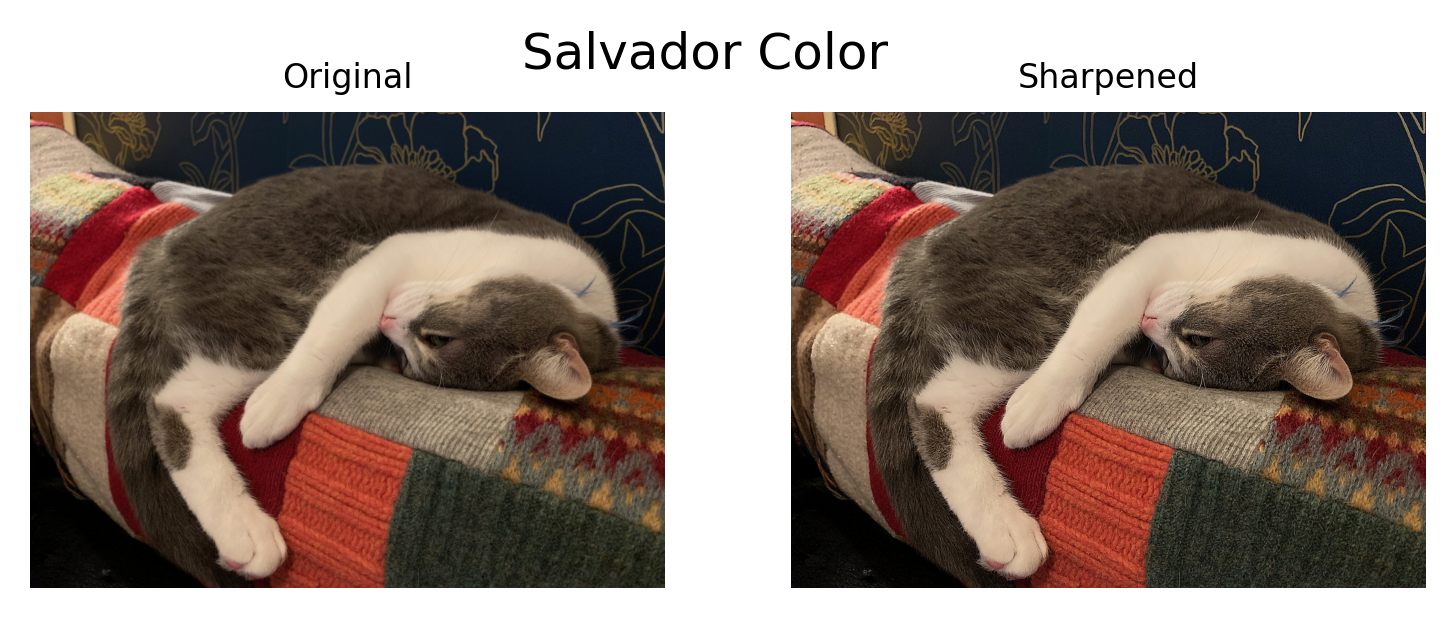

In [5]:

from PIL import ImageFilter

salvador_rgb = Image.open('../example-images/pets/salvador_sleeping.jpg')
salvador_rgb_sharp = salvador_rgb.filter(ImageFilter.UnsharpMask(radius=3, percent=300, threshold=3))

gallery = PlotGallery(title = 'Salvador Color', dpi = 300)
gallery.add_exhibit(Exhibit(salvador_rgb, 'Original'))
gallery.add_exhibit(Exhibit(salvador_rgb_sharp, 'Sharpened'))
gallery.open()

# salvador_rgb_sharp = array(salvador_rgb)
# salvador_rgb_sharp[0,0]
# salvador_rgb_sharp[:,0] = convolve(salvador_rgb_sharp[:,0], SHARPEN_FILTER)
# salvador_rgb_sharp[:,:,1] = convolve(salvador_rgb_sharp[:,:,1], SHARPEN_FILTER)
# salvador_rgb_sharp[:,:,2] = convolve(salvador_rgb_sharp[:,:,2], SHARPEN_FILTER)